In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## Load Iris dataset
df = pd.read_csv('iris.csv') 
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [3]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
x = df.iloc[:, [0,1, 2, 3]].values


## kmeans

In [5]:
#library for kmeans
from sklearn.cluster import KMeans

In [6]:
#Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

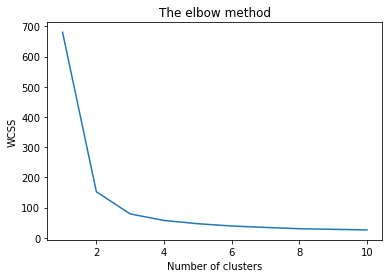

In [7]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

In [8]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

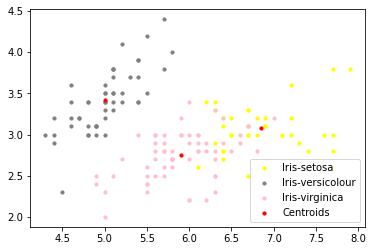

In [9]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 10, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 10, c = 'grey', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 10, c = 'pink', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 10, c = 'red', label = 'Centroids')

plt.legend()

## SVM

In [11]:
# prepare the data
X = df.drop('species', axis=1)  
y = df['species']  

In [12]:
#split the data into train and test
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  


In [13]:
#Import svm library
from sklearn import svm

In [14]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [16]:
#Model evaluation

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [17]:
# polynomial
from sklearn.svm import SVC  
svclassifier = SVC(kernel='poly', degree=8)  
svclassifier.fit(X_train, y_train)  


SVC(degree=8, kernel='poly')

In [18]:
y_pred = svclassifier.predict(X_test)  

In [19]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[ 9  0  0]
 [ 0  7  2]
 [ 0  1 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.88      0.78      0.82         9
   virginica       0.85      0.92      0.88        12

    accuracy                           0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [20]:
## Guassian kernel

from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train) 


y_pred = svclassifier.predict(X_test)  

In [21]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[ 9  0  0]
 [ 0  7  2]
 [ 0  0 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.78      0.88         9
   virginica       0.86      1.00      0.92        12

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [22]:
# sigmoid kernel

from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(X_train, y_train) 

y_pred = svclassifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[ 5  4  0]
 [ 6  3  0]
 [12  0  0]]
              precision    recall  f1-score   support

      setosa       0.22      0.56      0.31         9
  versicolor       0.43      0.33      0.38         9
   virginica       0.00      0.00      0.00        12

    accuracy                           0.27        30
   macro avg       0.22      0.30      0.23        30
weighted avg       0.19      0.27      0.21        30



C:\Users\vharsheny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
